In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite", echo=False)

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect = True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
measures = Base.classes.measurement
stations = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
sess = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
inspector = inspect(engine)
cols = inspector.get_columns('measurement')
for x in cols:
    print(x['name'], x['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [10]:
latest_date = sess.query(measures.date).\
                        order_by(measures.date.desc()).\
                        limit(1).all()[0][0]
print(latest_date)

2017-08-23


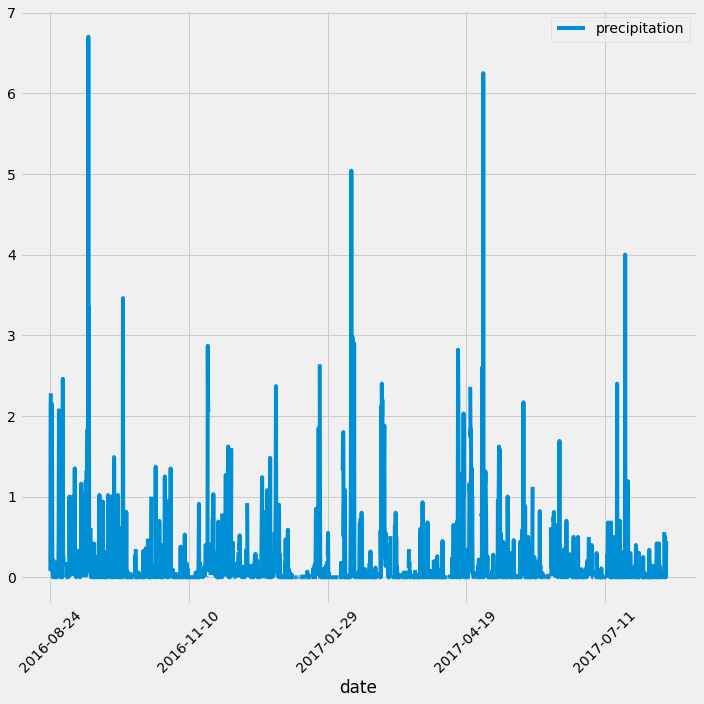

In [25]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database.

# Calculate the date one year from the last date in data set.

querydate = dt.datetime.strptime(latest_date, '%Y-%m-%d') - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
data = sess.query(measures.date, measures.prcp).\
        filter(measures.date > querydate).\
        order_by(measures.date).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
data_df = pd.DataFrame(data,columns=["date","precipitation"])
data_df.set_index('date',inplace=True)
data_df1 = data_df.sort_values(by = 'date')

data_df1.head()

data_df1.plot.line(rot = 45, figsize=(10,10))
plt.style.use('fivethirtyeight')
plt.tight_layout()
plt.show()

In [26]:
# Use Pandas to calcualte the summary statistics for the precipitation data
data_df.describe()

,precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [27]:
# Design a query to calculate the total number stations in the dataset
station_count = sess.query(stations.id).count()
print(station_count)

9


In [28]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.

stations_data = sess.query(measures.station, func.count(measures.station)).\
            group_by(measures.station).\
            order_by(func.count(measures.station).desc()).all()
print(stations_data)

[('USC00519281', 2772), ('USC00519397', 2724), ('USC00513117', 2709), ('USC00519523', 2669), ('USC00516128', 2612), ('USC00514830', 2202), ('USC00511918', 1979), ('USC00517948', 1372), ('USC00518838', 511)]


In [29]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.

station_1 = stations_data[0][0]

selection = [measures.station,
          func.avg(measures.tobs),
          func.min(measures.tobs),
          func.max(measures.tobs)]
active_station = sess.query(*selection).\
group_by(measures.station).\
filter(measures.station == station_1).all()
df_activestation = pd.DataFrame(active_station, columns =['Station','mean', 'min', 'max'])
df_activestation.set_index('Station', inplace=True)
df_activestation

,mean,min,max
Station,,,
USC00519281,71.663781,54.0,85.0


<function matplotlib.pyplot.show(close=None, block=None)>

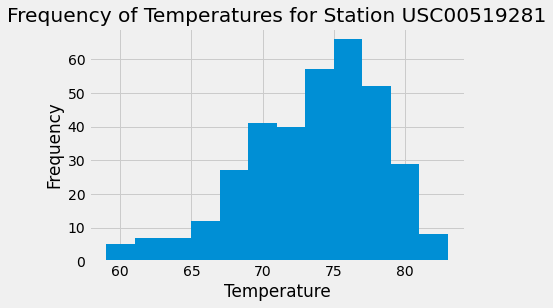

In [33]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
station_1_data = sess.query(measures.station, measures.tobs).filter(measures.date <= latest_date).\
        filter(measures.date >= querydate).filter(measures.station==station_1)

#Organize the data into a dataframe
data_df = pd.DataFrame(station_1_data, columns=['date', 'tobs'])


#Create axis for histogram, and code to create histogram

data_values = data_df["tobs"].tolist()

bins = 12

fig, axs = plt.subplots()
axs.hist(data_values, bins=bins)
plt.title(f'Frequency of Temperatures for Station {station_1}')
plt.ylabel('Frequency')
plt.xlabel('Temperature')
plt.tight_layout
plt.show


# Close session

In [ ]:
# Close Session
session.close()